Task 2


Exploratory Data Analytics (EDA)


In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
# from fastai.structured import *
from sklearn import metrics
# from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd
import pytz
import osmnx as ox

In [34]:
sns.set(rc={'figure.figsize':(13,8)})
#Block 4
tz = pytz.timezone('US/Eastern')
print("Data read")

Data read


In [35]:
pm = "https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv"

pmdata = pd.read_csv(pm, engine='python') # Contents of data
pmdata.columns

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm1', 'pm25', 'pm10'],
      dtype='object')

In [36]:
pmdata.shape

(118765, 33)

In [37]:
pmdata.head().T

0           1           2           3           4
SensorID      NYCP1_01A   NYCP1_01A   NYCP1_01A   NYCP1_01A   NYCP1_01A
time         1579618560  1579618560  1579618560  1579618560  1579618560
latitude      40.847183   40.847183   40.847179   40.847179   40.847179
longitude    -73.870087  -73.870094  -73.870094  -73.870094  -73.870094
bin0                 23          18          18          18          20
bin1                  1           2           1           1           3
bin2                  2           1           0           2           0
bin3                  0           0           0           0           2
bin4                  0           0           0           0           2
bin5                  0           0           0           0           0
bin6                  1           0           0           0           0
bin7                  0           0           0           0           0
bin8                  0           0           0           1           0
bin9                  0           0           0           0           0
bin10                 0           0           0           0           0
bin11                 0           0           0           0           0
bin12               0.0         0.0         0.0         0.0         0.0
bin13               0.0         0.0         0.0         0.0         0.0
bin14               0.0         0.0         0.0         0.0         0.0
bin15               0.0         0.0         0.0         0.0         0.0
bin16               0.0         0.0         0.0         0.0         0.0
bin17               0.0         0.0         0.0         0.0         0.0
bin18               0.0         0.0         0.0         0.0         0.0
bin19               0.0         0.0         0.0         0.0         0.0
bin20               0.0         0.0         0.0         0.0         0.0
bin21               0.0         0.0         0.0         0.0         0.0
bin22               0.0         0.0         0.0         0.0         0.0
bin23               0.0         0.0         0.0         0.0         0.0
temperature        16.3        16.2        16.1        16.1        16.0
humidity           15.2        15.1        15.1        15.2        15.2
pm1                1.44        1.05        0.74        1.15        2.13
pm25               5.91        1.18        0.76        4.48        5.77
pm10              11.35        1.18        0.76       47.36        6.18

Handling Missing Values


In [38]:
# counting the number of missing values in the na_counts dataset
na_counts = 0
na_counts += pmdata.latitude.isna().sum()
na_counts += pmdata.longitude.isna().sum()
na_counts += pmdata.temperature.isna().sum()
na_counts += pmdata.humidity.isna().sum()
na_counts += pmdata.pm1.isna().sum()
na_counts += pmdata.pm25.isna().sum()
na_counts += pmdata.pm10.isna().sum()
na_counts

0

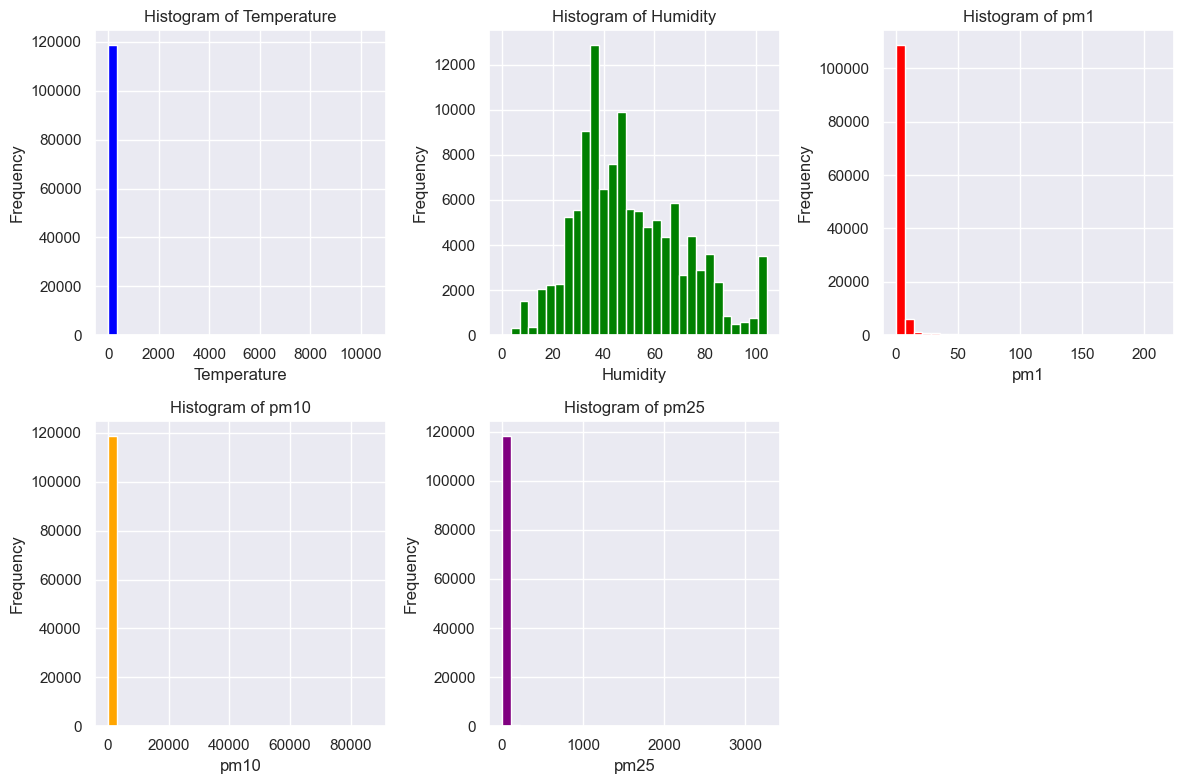

In [39]:
import matplotlib.pyplot as plt

# Assuming `data.temperature`, `data.humidity`, `data.pm1`, `data.pm10`, and `data.pm25` are your datasets
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# Plot histogram for temperature
axs[0, 0].hist(pmdata.temperature, bins=30, color='blue')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Temperature')

# Plot histogram for humidity
axs[0, 1].hist(pmdata.humidity, bins=30, color='green')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Humidity')

# Plot histogram for pm1
axs[0, 2].hist(pmdata.pm1, bins=30, color='red')
axs[0, 2].set_xlabel('pm1')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('Histogram of pm1')

# Plot histogram for pm10
axs[1, 0].hist(pmdata.pm10, bins=30, color='orange')
axs[1, 0].set_xlabel('pm10')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of pm10')

# Plot histogram for pm25
axs[1, 1].hist(pmdata.pm25, bins=30, color='purple')
axs[1, 1].set_xlabel('pm25')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of pm25')

# Hide the empty subplot in the last position of the first row
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


the graphs representation is a prove that there is an outlear in the Temperature, pm1, p10 and pm25 so let's remove them


We know from the prevous task that the max value of the temperature is the outlear so let's delete it


In [40]:
# remove max() of Temperature, pm1, p10 and pm25
pmdata = pmdata[pmdata.temperature < pmdata.temperature.max()]

In [41]:
# number of 0 values in pm1
pmdata[pmdata.pm1 == 0].shape

(2910, 33)

Achieving a concentration of PM1 particles at exactly zero in outdoor air is highly unlikely under normal circumstances due to various natural and human-made sources of particulate matter.


In [42]:
# remove 0 values in pm1
pmdata = pmdata[pmdata.pm1 != 0]

To uncover outliers in PM10 and PM2.5 values, we'll employ statistical techniques aimed at pinpointing data points that deviate significantly from the norm.


In [43]:
# Assuming your pm10 data is stored in a pandas DataFrame named 'data' with a column named 'pm10'
def remove_outliers(pm):
    global pmdata
    # Calculate the mean and standard deviation of the PM10 values
    mean_value = pmdata[pm].mean()
    std_dev = pmdata[pm].std()

    # Define a threshold for identifying outliers (for example, using a z-score)
    # You can adjust this threshold based on your specific dataset and requirements
    threshold = 2  # Adjust as needed

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = mean_value - (std_dev * threshold)
    upper_bound = mean_value + (std_dev * threshold)

    # Remove the outliers
    pmdata = pmdata[(pmdata[pm] >= lower_bound) & (pmdata[pm] <= upper_bound)]


In [44]:
remove_outliers('pm10')
remove_outliers('pm25')

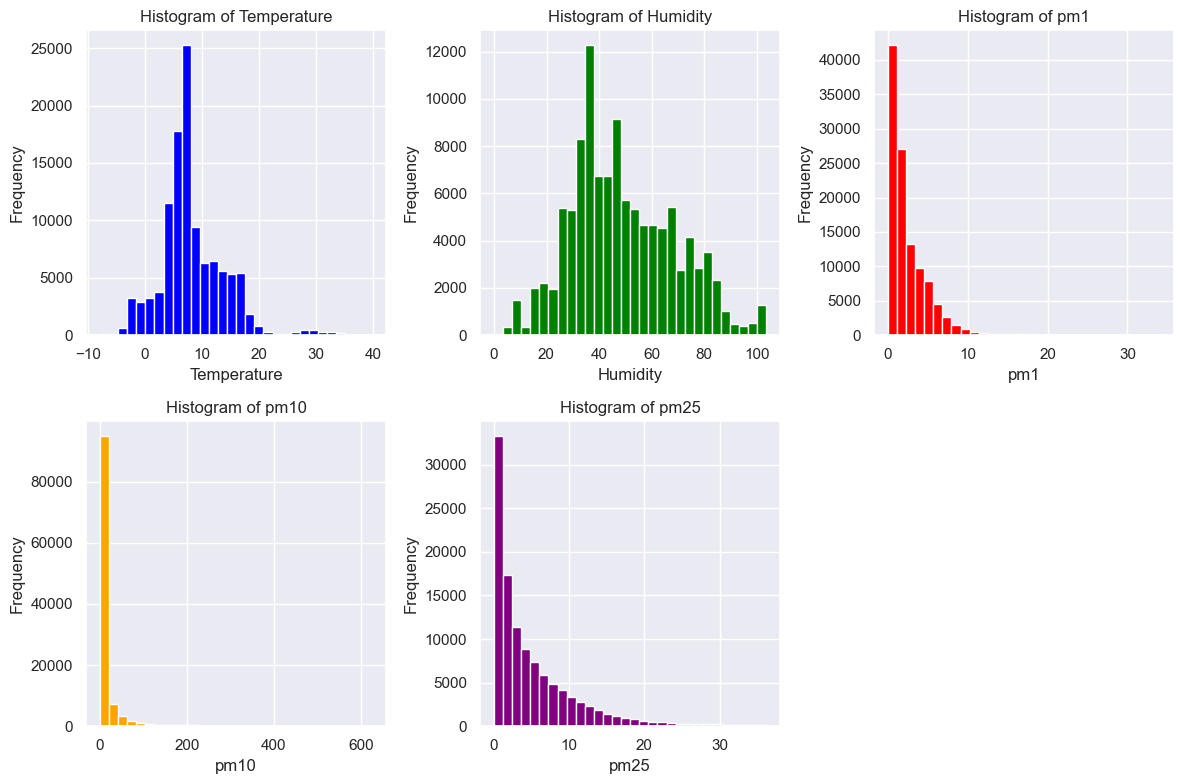

In [45]:
# Assuming `data.temperature`, `data.humidity`, `data.pm1`, `data.pm10`, and `data.pm25` are your datasets
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

# Plot histogram for temperature
axs[0, 0].hist(pmdata.temperature, bins=30, color='blue')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Temperature')

# Plot histogram for humidity
axs[0, 1].hist(pmdata.humidity, bins=30, color='green')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Humidity')

# Plot histogram for pm1
axs[0, 2].hist(pmdata.pm1, bins=30, color='red')
axs[0, 2].set_xlabel('pm1')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('Histogram of pm1')

# Plot histogram for pm10
axs[1, 0].hist(pmdata.pm10, bins=30, color='orange')
axs[1, 0].set_xlabel('pm10')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of pm10')

# Plot histogram for pm25
axs[1, 1].hist(pmdata.pm25, bins=30, color='purple')
axs[1, 1].set_xlabel('pm25')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of pm25')

# Hide the empty subplot in the last position of the first row
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [46]:
#Since our time data is in a Unix timestamp format, we need to convert it to a more readable format.
pmdata['time'] = pd.to_datetime(pmdata['time'], unit='s')  # Assuming the time is in seconds
# Now, format the datetime as desired
pmdata['time'] = pmdata['time'].dt.strftime('%Y/%m/%d %H:%M')

In [47]:
'''pmdata_sample = pmdata.sample(frac=0.1)'''

- Shortest Path using Pm25 value
- Shortest Path using temperature value
- shortest path using humidity value


In [48]:
#loading the nyc_polygon.geojson file
nyc_polygon = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')

# making sure that the CRS is correct (coordinate reference system)
nyc_polygon = nyc_polygon.to_crs('EPSG:4326')

#extracting the street network for walking
G = ox.graph_from_polygon(nyc_polygon.geometry.unary_union, network_type='walk')


Shortest path using Pm25 value


In [49]:
avg_pm25 = pmdata.groupby(['latitude', 'longitude']).agg({'pm25': 'mean'}).reset_index()

# Update the graph G with PM2.5 levels as weights
for u, v, key, data in G.edges(keys=True, data=True):
    # This assumes 'osmid' corresponds to 'index_right0' in joined_data
    # You might need to adjust this if a different identifier links edges in G to rows in joined_data
    if (u, v, key) in avg_pm25:
        G[u][v][key]['pm25_weight'] = avg_pm25.loc[(u, v, key)]
    else:
        G[u][v][key]['pm25_weight'] = float('inf')

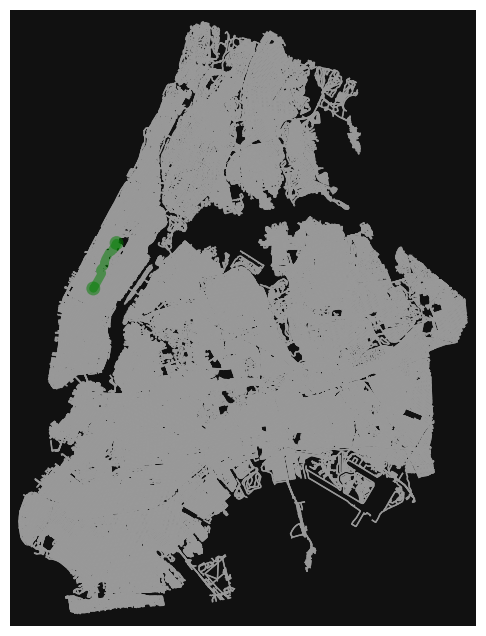

In [50]:
import networkx as nx
# Finding nearest nodes to start and destination points
start_point = (40.785091, -73.968285)  # Central Park approximate location
end_point = (40.758896, -73.985130)  # Times Square approximate location
start_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
end_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])

# Calculate shortest path using pm25 value
shortest_path = nx.shortest_path(G, start_node, end_node,  weight='pm25_weight', method='dijkstra')
fig, ax = ox.plot_graph_route(G, shortest_path, route_color='green', route_linewidth=6, node_size=0) 

In [51]:
avg_temp = pmdata.groupby(['latitude', 'longitude']).agg({'temperature': 'mean'}).reset_index()

# Update the graph G with temperature levels as weights
for u, v, key, data in G.edges(keys=True, data=True):
    # This assumes 'osmid' corresponds to 'index_right0' in joined_data
    # You might need to adjust this if a different identifier links edges in G to rows in joined_data
    if (u, v, key) in avg_temp:
        G[u][v][key]['temperature'] = avg_temp.loc[(u, v, key)]
    else:
        G[u][v][key]['temperature'] = float('inf')

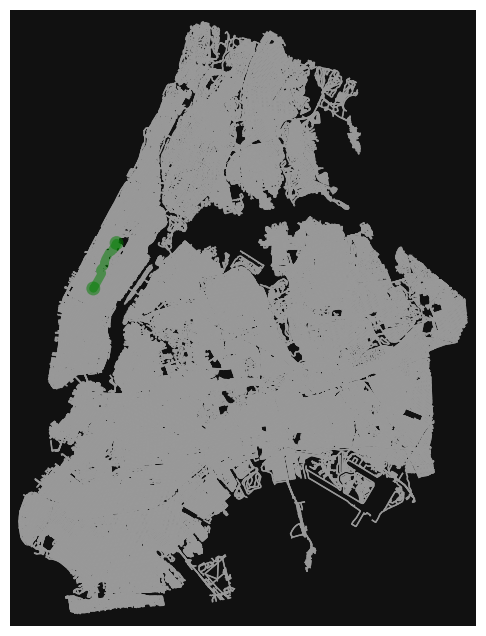

In [52]:
# Finding nearest nodes to start and destination points
start_point = (40.785091, -73.968285)  # Central Park approximate location
end_point = (40.758896, -73.985130)  # Times Square approximate location
start_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
end_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])

# Calculate shortest path using pm25 value
shortest_path = nx.shortest_path(G, start_node, end_node,  weight='temperature', method='dijkstra')
fig, ax = ox.plot_graph_route(G, shortest_path, route_color='green', route_linewidth=6, node_size=0) 

Shortest Path using humidity


In [53]:
avg_humidity = pmdata.groupby(['latitude', 'longitude']).agg({'humidity': 'mean'}).reset_index()

# Update the graph G with temperature levels as weights
for u, v, key, data in G.edges(keys=True, data=True):
    # This assumes 'osmid' corresponds to 'index_right0' in joined_data
    # You might need to adjust this if a different identifier links edges in G to rows in joined_data
    if (u, v, key) in avg_humidity:
        G[u][v][key]['humidity'] = avg_humidity.loc[(u, v, key)]
    else:
        G[u][v][key]['humidity'] = float('inf')

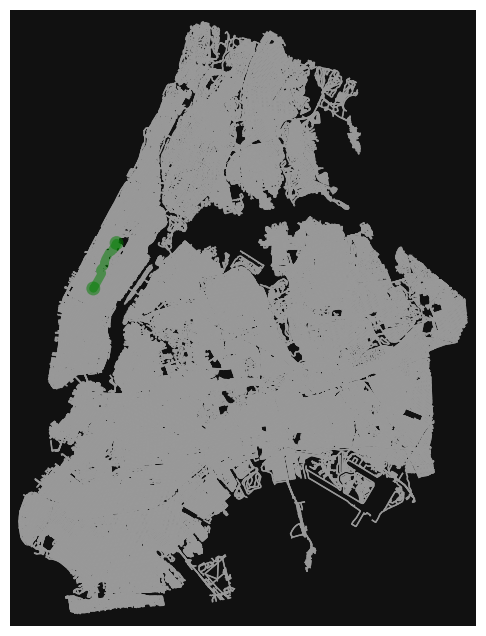

In [54]:
# Finding nearest nodes to start and destination points
start_point = (40.785091, -73.968285)  # Central Park approximate location
end_point = (40.758896, -73.985130)  # Times Square approximate location
start_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
end_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])

# Calculate shortest path using pm25 value
shortest_path = nx.shortest_path(G, start_node, end_node,  weight='humidity', method='dijkstra')
fig, ax = ox.plot_graph_route(G, shortest_path, route_color='green', route_linewidth=6, node_size=0) 

Shortest Path using pm25, temperature and humidity


In [67]:
# Calculate the weighted rating based on the formula provided
# pm25 has major role in determining pollution rating, so its multiplied by probability.
# humidity also has an important role, because is humid atmosphere partricles remain suspended in air mostly, so it is mulitplied with 0.8 probability.
# temperature is neutral towards air pollution, so it is multiplied by 0.5 probability.
def calculate_weighted_rating(pm25, temp, humi):
    return pm25 + (0.8 * humi) +(0.5* temp)

# Update the graph G with weighted ratings as edge weights
for u, v, key, data in G.edges(keys=True, data=True):
    # weighted_rating = calculate_weighted_rating(avg_pm25.loc[(u, v, key)], avg_temp.loc[(u, v, key)], avg_humidity.loc[(u, v, key)])
    weighted_rating = calculate_weighted_rating(avg_pm25.loc[u, v], avg_temp.loc[u, v], avg_humidity.loc[u, v])

    if (u, v, key):
        G[u][v][key]['weighted_rating'] = weighted_rating
    else:
        G[u][v][key]['weighted_rating'] = float('inf')

u: 30807314 v: 2057103273
u: 30807314 v: 6579409036
u: 30807314 v: 1203806263
u: 30807314 v: 1203806304
u: 30978752 v: 2059303879
u: 30978752 v: 3156429739
u: 30978752 v: 1492282482
u: 30978752 v: 4256322265
u: 42421728 v: 7784826657
u: 42421728 v: 7784826658
u: 42421728 v: 7784826655
u: 42421731 v: 10171363561
u: 42421731 v: 10171363560
u: 42421731 v: 10171363559
u: 42421731 v: 10171363562
u: 42421737 v: 10171363583
u: 42421737 v: 10171363584
u: 42421737 v: 10171363585
u: 42421737 v: 10171363586
u: 42421741 v: 10166004078
u: 42421741 v: 10166004080
u: 42421741 v: 10166004077
u: 42421741 v: 10166004079
u: 42421745 v: 6900903299
u: 42421745 v: 1061531654
u: 42421745 v: 10166004117
u: 42421745 v: 6900903341
u: 42421749 v: 9177516871
u: 42421749 v: 11548264834
u: 42421749 v: 6900903307
u: 42421749 v: 11548264835
u: 42421751 v: 7785782268
u: 42421751 v: 11380682066
u: 42421751 v: 42437920
u: 42421751 v: 11378635399
u: 42421769 v: 9897810863
u: 42421769 v: 9897810855
u: 42421769 v: 98978108

KeyboardInterrupt: 

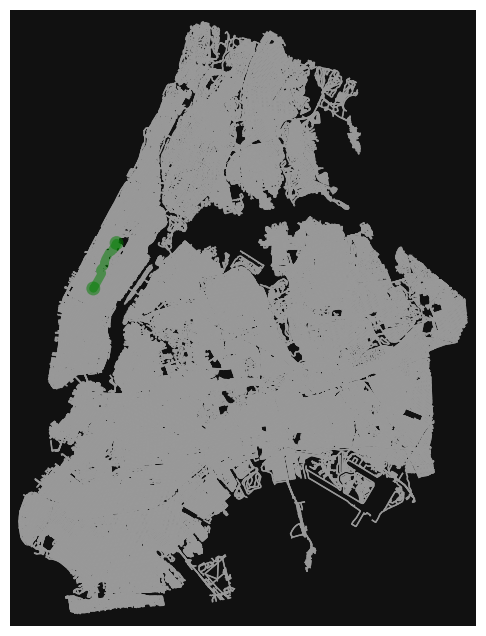

In [68]:
# Finding nearest nodes to start and destination points
start_point = (40.785091, -73.968285)  # Central Park approximate location
end_point = (40.758896, -73.985130)  # Times Square approximate location
start_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
end_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])

# Calculate shortest path using pm25 value
shortest_path = nx.shortest_path(G, start_node, end_node,  weight='weighted_rating', method='dijkstra')
fig, ax = ox.plot_graph_route(G, shortest_path, route_color='green', route_linewidth=6, node_size=0) 